# 6.支持向量机

导入原始数据

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from scipy.io import loadmat

In [2]:
data1 = loadmat('./data/ex6data1.mat')
type(data1),data1

(dict,
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
  '__version__': '1.0',
  '__globals__': [],
  'X': array([[1.9643  , 4.5957  ],
         [2.2753  , 3.8589  ],
         [2.9781  , 4.5651  ],
         [2.932   , 3.5519  ],
         [3.5772  , 2.856   ],
         [4.015   , 3.1937  ],
         [3.3814  , 3.4291  ],
         [3.9113  , 4.1761  ],
         [2.7822  , 4.0431  ],
         [2.5518  , 4.6162  ],
         [3.3698  , 3.9101  ],
         [3.1048  , 3.0709  ],
         [1.9182  , 4.0534  ],
         [2.2638  , 4.3706  ],
         [2.6555  , 3.5008  ],
         [3.1855  , 4.2888  ],
         [3.6579  , 3.8692  ],
         [3.9113  , 3.4291  ],
         [3.6002  , 3.1221  ],
         [3.0357  , 3.3165  ],
         [1.5841  , 3.3575  ],
         [2.0103  , 3.2039  ],
         [1.9527  , 2.7843  ],
         [2.2753  , 2.7127  ],
         [2.3099  , 2.9584  ],
         [2.8283  , 2.6309  ],
         [3.0473  , 2.2931  ],
         

绘制原始数据图

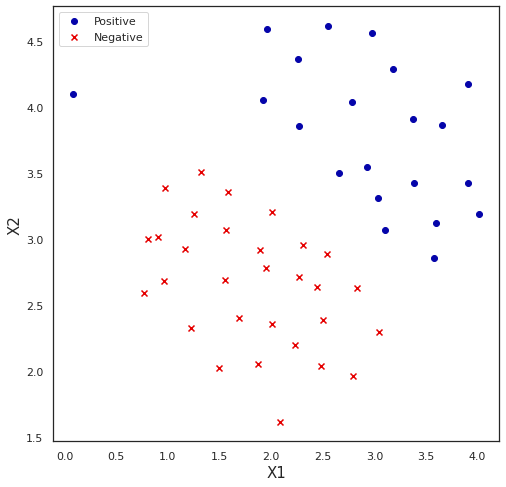

In [3]:
data_tmp = pd.DataFrame(data1['X'], columns=['X1', 'X2'])
data_tmp['y'] = data1['y']

pos_data = data_tmp[data_tmp['y'].isin([1])]
neg_data = data_tmp[data_tmp['y'].isin([0])]

sb.set(context='notebook', style='white')
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel('X1', fontsize=15)
ax.set_ylabel('X2', fontsize=15)
ax.scatter(pos_data['X1'], pos_data['X2'], marker='o', label='Positive', c=sb.xkcd_rgb['royal blue'] )
ax.scatter(neg_data['X1'], neg_data['X2'], marker='x', label='Negative', c=sb.xkcd_rgb['red'])
ax.legend(loc=2)

## 6.2 利用SVM进行线性分离

Hinge Loss：
<center>
    $C \sum\limits^{N}_{i=1} \big[1 - y_i(\omega \cdot x_i + b) \big]_{+} + ||\omega||^2$
</center>

第一项是损失，第二项是正则化。

$x_i$是第i个样本的特征向量，$y_i$是其标签（1或-1）

对于正样本$\omega \cdot x_i + b > 1$，负样本$\omega \cdot x_i + b < -1$，可以统一为$y_i(\omega \cdot x_i + b) \geq 1$。

当$y_i(\omega \cdot x_i + b) \geq 1$时，分类正确，loss为0

否则loss就为$1-y_i(\omega \cdot x_i + b)$。

其中：
<center>
$[z]_+ = \left\{
\begin{aligned}
z, z > 0 \\
0, z \leq 0
\end{aligned}
\right.
$

In [4]:
from sklearn import svm

### C=1的情况下进行线性分离

In [5]:
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, loss='hinge')

In [6]:
# 根据所给的数据拟合模型
svc.fit(data_tmp[['X1','X2']], data_tmp['y'])
# 基于所给的数据和标签返回平均准确度
svc.score(data_tmp[['X1','X2']], data_tmp['y'])

/home/qingren/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9803921568627451

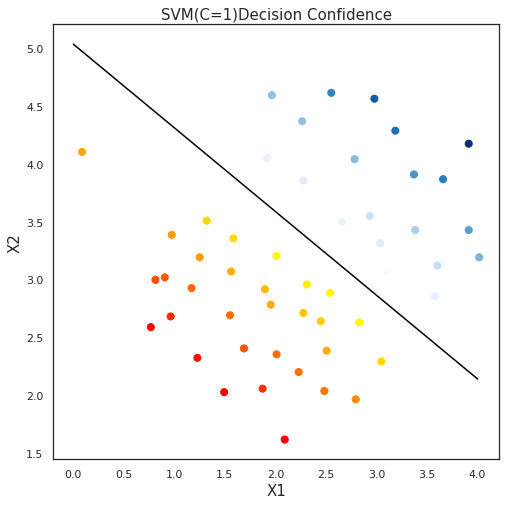

In [7]:
# 预测样本的置信度得分
data_tmp['SVM 1 Confidence'] = svc.decision_function(data_tmp[['X1','X2']])

#划分数据
pos_data = data_tmp[data_tmp['SVM 1 Confidence'] > 0]
neg_data = data_tmp[data_tmp['SVM 1 Confidence'] < 0]

# 获得分配给特征的权重
w = svc.coef_
b = svc.intercept_

# 决策边界方程
a = -w[0,0]/w[0,1]
b = -b/w[0,1]
x1 = np.arange(0, np.max(data_tmp['X1']), 0.1)
x2 = a*x1 + b

# 绘图
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x1,x2,color='black')
ax.scatter(pos_data['X1'], pos_data['X2'], s=50, c=pos_data['SVM 1 Confidence'], cmap='Blues', label='Positive')
ax.scatter(neg_data['X1'], neg_data['X2'], s=50, c=neg_data['SVM 1 Confidence'], cmap='autumn', label='Negative')
ax.set_xlabel('X1', fontsize=15)
ax.set_ylabel('X2', fontsize=15)
ax.set_title('SVM(C=1)Decision Confidence', fontsize=15)
plt.show()

可以看出左上角的点分类错误，但是有比较好的容错率

### C=200情况下进行线性分离

/home/qingren/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


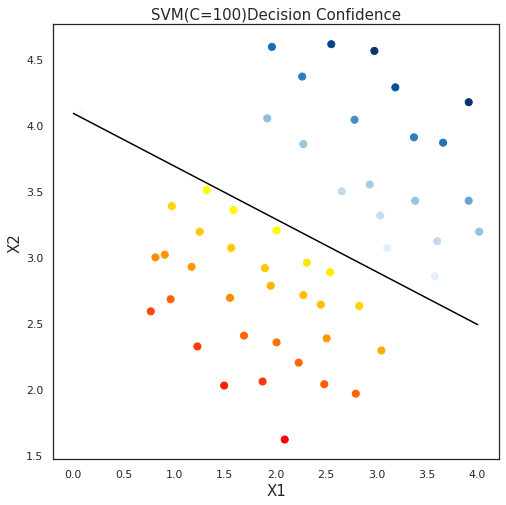

In [8]:
svc2 = svm.LinearSVC(C=200, loss='hinge', max_iter=1000)
svc2.fit(data_tmp[['X1','X2']], data_tmp['y'])
data_tmp['SVM 2 Confidence'] = svc2.decision_function(data_tmp[['X1','X2']])

pos_data2 = data_tmp[data_tmp['SVM 2 Confidence'] > 0]
neg_data2 = data_tmp[data_tmp['SVM 2 Confidence'] < 0]

w2 = svc2.coef_
b2 = svc2.intercept_

a2 = -w2[0,0]/w2[0,1]
b2 = -b2/w2[0,1]
x1 = np.arange(0, np.max(data_tmp['X1']), 0.1)
x2 = a2*x1 + b2

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x1,x2,color='black')
ax.scatter(pos_data2['X1'], pos_data2['X2'], s=50, c=pos_data2['SVM 2 Confidence'], cmap='Blues', label='Positive')
ax.scatter(neg_data2['X1'], neg_data2['X2'], s=50, c=neg_data2['SVM 2 Confidence'], cmap='autumn', label='Negative')
ax.set_xlabel('X1', fontsize=15)
ax.set_ylabel('X2', fontsize=15)
ax.set_title('SVM(C=100)Decision Confidence', fontsize=15)
plt.show()

可以看到当C增大后，将原先分类出错了的点也分类正确了，但是容错率变坏了，并不像一个好的决策边界

## 6.3曲线分离

导入原始数据

In [9]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-np.sum((x1 - x2)**2)/(2 * (sigma**2)))

In [10]:
data2 = loadmat('./data/ex6data2.mat')
type(data2),data2

(dict,
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
  '__version__': '1.0',
  '__globals__': [],
  'X': array([[0.107143 , 0.60307  ],
         [0.093318 , 0.649854 ],
         [0.0979263, 0.705409 ],
         ...,
         [0.975806 , 0.439474 ],
         [0.989631 , 0.425439 ],
         [0.996544 , 0.414912 ]]),
  'y': array([[1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1

In [11]:
data_tmp2 = pd.DataFrame(data2['X'],columns=['X1', 'X2'])
data_tmp2['y'] = data2['y']
data_tmp2

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
...,...,...,...
858,0.994240,0.516667,1
859,0.964286,0.472807,1
860,0.975806,0.439474,1
861,0.989631,0.425439,1


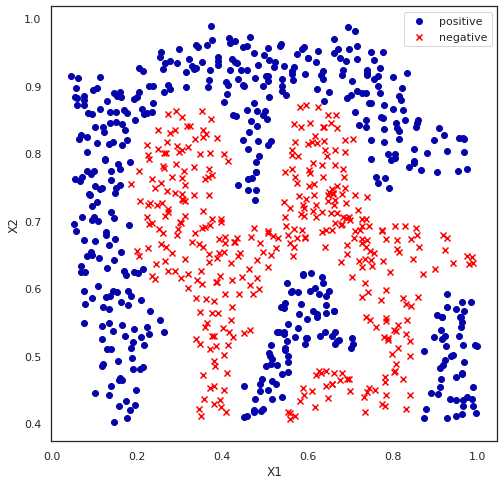

In [12]:
pos_date_3 = data_tmp2[data_tmp2['y'].isin([1])]
neg_date_3 = data_tmp2[data_tmp2['y'].isin([0])]

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(pos_date_3['X1'], pos_date_3['X2'], marker='o', label='positive', color=sb.xkcd_rgb['royal blue'])
ax.scatter(neg_date_3['X1'], neg_date_3['X2'], marker='x', label='negative', color='red')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(loc=1)
plt.show()

使用支持向量机对其进行分类

In [13]:
svc3 = svm.SVC(C=100, gamma=10, probability=True, kernel='rbf')
svc3

SVC(C=100, gamma=10, probability=True)

In [14]:
svc.fit(data_tmp2[['X1', 'X2']], data_tmp2['y'])
# 给模型打分
svc.score(data_tmp2[['X1', 'X2']], data_tmp2['y'])

/home/qingren/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5538818076477404

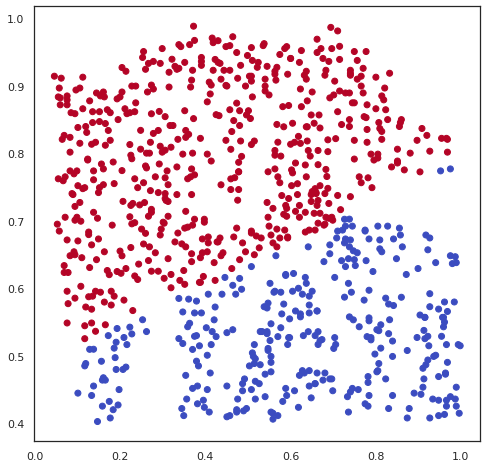

In [15]:
data_tmp2['Probability'] = svc.predict(data_tmp2[['X1', 'X2']])
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(data_tmp2['X1'], data_tmp2['X2'], c=data_tmp2['Probability'], cmap='coolwarm')
plt.show()

这个模型分类效果较差，可以尝试优化参数

## 6.4 寻找最优超参数

In [16]:
data3 = loadmat('data/ex6data3.mat')

X = data3['X']
Xval = data3['Xval']
y = data3['y'].ravel()
yval = data3['yval'].ravel()

In [17]:
data_tmp3 = pd.DataFrame(X,columns=['X1', 'X2'])
data_tmp3['y'] = y

data_tmp3_val = pd.DataFrame(Xval, columns=['Xval1', 'Xval2'])
data_tmp3_val['yval'] = yval

In [18]:
data_tmp3

,X1,X2,y
0,-0.158986,0.423977,1
1,-0.347926,0.470760,1
2,-0.504608,0.353801,1
3,-0.596774,0.114035,1
4,-0.518433,-0.172515,1
...,...,...,...
206,-0.399885,-0.621930,1
207,-0.124078,-0.126608,1
208,-0.316935,-0.228947,1
209,-0.294124,-0.134795,0


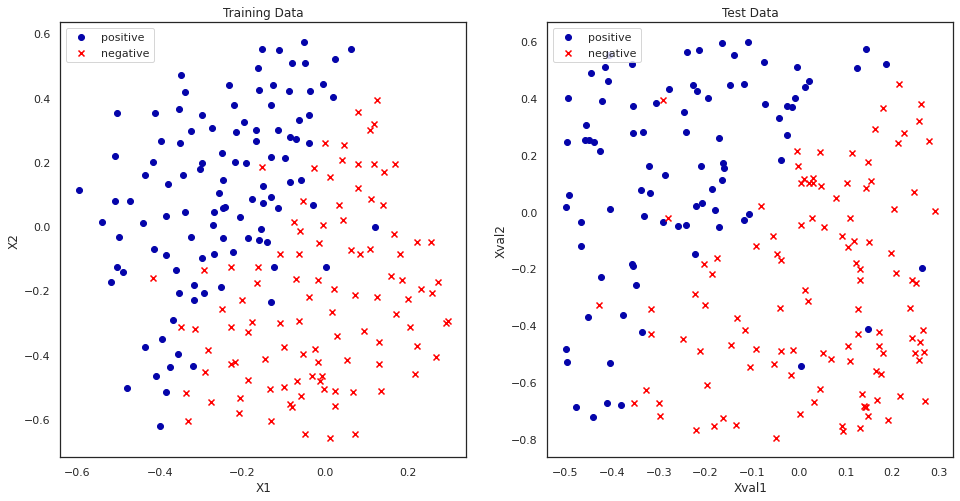

In [19]:
# 观察样本数据和测试数据
pos_data_4 = data_tmp3[data_tmp3['y'].isin([1])]
neg_data_4 = data_tmp3[data_tmp3['y'].isin([0])]

fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(pos_data_4['X1'], pos_data_4['X2'], marker='o', label='positive', color=sb.xkcd_rgb['royal blue'])
ax1.scatter(neg_data_4['X1'], neg_data_4['X2'], marker='x', label='negative', color='red')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_title('Training Data')
ax1.legend(loc=2)

pos_data_4_val = data_tmp3_val[data_tmp3_val['yval'].isin([1])]
neg_data_4_val = data_tmp3_val[data_tmp3_val['yval'].isin([0])]

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(pos_data_4_val['Xval1'], pos_data_4_val['Xval2'], marker='o', label='positive', color=sb.xkcd_rgb['royal blue'])
ax2.scatter(neg_data_4_val['Xval1'], neg_data_4_val['Xval2'], marker='x', label='negative', color='red')
ax2.set_xlabel('Xval1')
ax2.set_ylabel('Xval2')
ax2.legend(loc=2)
ax2.set_title('Test Data')
plt.show()

In [20]:
X.shape,Xval.shape,y.shape,yval.shape

((211, 2), (200, 2), (211,), (200,))

In [21]:
# 寻找最优超参
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 100]

best_score = 0
best_params = {'C': None, 'gamma': None}

frame = pd.DataFrame(columns=['C', 'gamma', 'score'])

index = 0
for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma, kernel='rbf')
        svc.fit(X,y)
        score = svc.score(Xval, yval)
        frame.loc[index] = [C, gamma, score]
        index += 1
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

In [22]:
best_params,best_score

({'C': 0.3, 'gamma': 100}, 0.965)

In [23]:
# 绘制决策边检
def plot_hyperplane(svc, X, y):
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.005), np.arange(x2_min, x2_max, 0.005))
    Z = svc.predict(np.c_[x1.ravel(), x2.ravel()])
    Z = np.reshape(Z, x1.shape)
    fig = plt.figure(figsize=(8, 8))
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_title('Test Data and Decision Boundary', fontsize=15)
    ax1.set_xlabel('X1', fontsize=15)
    ax1.set_ylabel('X2', fontsize=15)
    ax1.contourf(x1, x2, Z, cmap='coolwarm', alpha=0.5)
    
    pos_data = X[y == 0]
    neg_data = X[y == 1]
    ax1.scatter(pos_data[:,0], pos_data[:,1], c=sb.xkcd_rgb['royal blue'], label='positive')
    ax1.scatter(neg_data[:,0], neg_data[:,1], c='red', label='negitive')
    ax1.legend(loc=1)
    
    sv = svc.support_vectors_
    ax1.scatter(sv[:, 0], sv[:, 1], c='green', marker='.', s=10)
    plt.show()

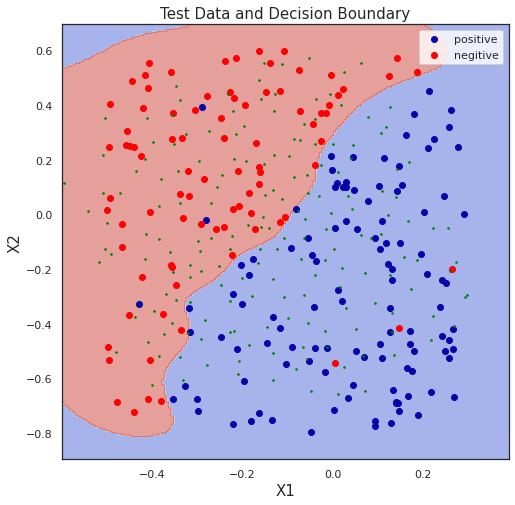

In [24]:
svc = svm.SVC(C=0.3, gamma=100, kernel='rbf')
svc.fit(X,y)
plot_hyperplane(svc, Xval,yval)

## 6.5 构建垃圾文件分类器

In [25]:
spam_train = loadmat('data/spamTrain.mat')
spam_test = loadmat('data/spamTest.mat')

In [26]:
spam_train

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'y': array([[1],
        [1],
        [0],
        ...,
        [1],
        [0],
        [0]], dtype=uint8)}

In [27]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y']
ytest = spam_test['ytest']
X.shape, y.shape, Xtest.shape, ytest.shape

((4000, 1899), (4000, 1), (1000, 1899), (1000, 1))

In [28]:
svc = svm.SVC(kernel='rbf')
svc.fit(X,y)
print('Training accuracy = {}%'.format(np.around(svc.score(X,y)*100, 2)))

/home/qingren/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training accuracy = 99.32%


In [29]:
print('Test accuracy = {}%'.format(np.around(svc.score(Xtest,ytest)*100, 2)))

Test accuracy = 98.7%


对垃圾邮件数据，使用支持向量机进行分类，测试集准确率达98.7%